## Connect to the database

In [1]:
!pip install sqlalchemy==1.3.9

  Using cached SQLAlchemy-1.3.9-cp311-cp311-linux_x86_64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.34
    Uninstalling SQLAlchemy-2.0.34:
      Successfully uninstalled SQLAlchemy-2.0.34
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.
jupyterhub 4.1.5 requires SQLAlchemy>=1.4, but you have sqlalchemy 1.3.9 which is incompatible.


In [2]:
!pip install ipython-sql

  Using cached SQLAlchemy-2.0.34-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.6 kB)
Using cached SQLAlchemy-2.0.34-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [38]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 113.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 130.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 120.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 15.2 MB/s eta 0:00:00


In [4]:
%load_ext sql

In [6]:
!pip install -q pandas

In [7]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [8]:
%sql sqlite:///my_data1.db

In [9]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [10]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [11]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

## Task 1 :Display the names of the unique launch sites in the space mission

In [16]:
import sqlite3

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Check if the table exists
cur.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='SPACEXTABLE';")
table_exists = cur.fetchone()

if table_exists:
    print("Table SPACEXTABLE exists.")
    
    # Query to get unique launch sites
    query = "SELECT DISTINCT Launch_Site FROM SPACEXTABLE"
    
    # Execute the query
    cur.execute(query)
    
    # Fetch all results
    launch_sites = cur.fetchall()
    
    # Print the unique launch sites
    print("Unique Launch Sites:")
    for site in launch_sites:
        print(site[0])
else:
    print("Table SPACEXTABLE does not exist.")

# Close the connection
con.close()

Table SPACEXTABLE exists.
Unique Launch Sites:
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


## Task 2 :Display 5 records where launch sites begin with the string 'CCA

In [18]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

In [19]:
# Query to get 5 records where launch sites begin with 'CCA'
query = "SELECT * FROM SPACEXTABLE WHERE Launch_Site LIKE 'CCA%' LIMIT 5"

# Execute the query
cur.execute(query)

# Fetch all results
records = cur.fetchall()

# Print the records
print("Records where launch sites begin with 'CCA':")
for record in records:
    print(record)

# Close the connection
con.close()

Records where launch sites begin with 'CCA':
('2010-06-04', '18:45:00', 'F9 v1.0  B0003', 'CCAFS LC-40', 'Dragon Spacecraft Qualification Unit', 0, 'LEO', 'SpaceX', 'Success', 'Failure (parachute)')
('2010-12-08', '15:43:00', 'F9 v1.0  B0004', 'CCAFS LC-40', 'Dragon demo flight C1, two CubeSats, barrel of Brouere cheese', 0, 'LEO (ISS)', 'NASA (COTS) NRO', 'Success', 'Failure (parachute)')
('2012-05-22', '7:44:00', 'F9 v1.0  B0005', 'CCAFS LC-40', 'Dragon demo flight C2', 525, 'LEO (ISS)', 'NASA (COTS)', 'Success', 'No attempt')
('2012-10-08', '0:35:00', 'F9 v1.0  B0006', 'CCAFS LC-40', 'SpaceX CRS-1', 500, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt')
('2013-03-01', '15:10:00', 'F9 v1.0  B0007', 'CCAFS LC-40', 'SpaceX CRS-2', 677, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt')


## Task 3 :Display the total payload mass carried by boosters launched by NASA (CRS)

In [20]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

In [21]:
# Query to get the total payload mass carried by boosters launched by NASA (CRS)
query = "SELECT SUM(PAYLOAD_MASS__KG_) FROM SPACEXTABLE WHERE Customer LIKE 'NASA (CRS)'"

# Execute the query
cur.execute(query)

# Fetch the result
total_payload_mass = cur.fetchone()[0]

# Print the total payload mass
print(f"Total payload mass carried by boosters launched by NASA (CRS): {total_payload_mass} kg")

# Close the connection
con.close()

Total payload mass carried by boosters launched by NASA (CRS): 45596 kg


## Task 4: Display average payload mass carried by booster version F9 v1.1

In [22]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

In [23]:
# Query to get the average payload mass carried by booster version F9 v1.1
query = "SELECT AVG(PAYLOAD_MASS__KG_) FROM SPACEXTABLE WHERE Booster_Version = 'F9 v1.1'"

# Execute the query
cur.execute(query)

# Fetch the result
avg_payload_mass = cur.fetchone()[0]

# Print the average payload mass
print(f"Average payload mass carried by booster version F9 v1.1: {avg_payload_mass} kg")

# Close the connection
con.close()

Average payload mass carried by booster version F9 v1.1: 2928.4 kg


## Task 5 :List the date when the first succesful landing outcome in ground pad was acheived.

In [24]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

In [25]:
# Query to get the date of the first successful landing outcome in ground pad
query = """
SELECT MIN(Date) 
FROM SPACEXTABLE 
WHERE Landing_Outcome = 'Success (ground pad)'
"""

# Execute the query
cur.execute(query)

# Fetch the result
first_successful_landing_date = cur.fetchone()[0]

# Print the date of the first successful landing outcome in ground pad
print(f"Date of the first successful landing outcome in ground pad: {first_successful_landing_date}")

# Close the connection
con.close()

Date of the first successful landing outcome in ground pad: 2015-12-22


## Task 6 :List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000

In [26]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

In [27]:
# Query to get the names of the boosters with success in drone ship and payload mass between 4000 and 6000
query = """
SELECT Booster_Version 
FROM SPACEXTABLE 
WHERE Landing_Outcome = 'Success (drone ship)' 
AND PAYLOAD_MASS__KG_ > 4000 
AND PAYLOAD_MASS__KG_ < 6000
"""

# Execute the query
cur.execute(query)

# Fetch all results
boosters = cur.fetchall()

# Print the names of the boosters
print("Names of the boosters with success in drone ship and payload mass between 4000 and 6000:")
for booster in boosters:
    print(booster[0])

# Close the connection
con.close()

Names of the boosters with success in drone ship and payload mass between 4000 and 6000:
F9 FT B1022
F9 FT B1026
F9 FT  B1021.2
F9 FT  B1031.2


## Task 7:List the total number of successful and failure mission outcomes

In [28]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

In [29]:
# Query to get the total number of successful and failure mission outcomes
query = """
SELECT 
    (SELECT COUNT(*) FROM SPACEXTABLE WHERE Mission_Outcome LIKE 'Success%') AS Successful_Missions,
    (SELECT COUNT(*) FROM SPACEXTABLE WHERE Mission_Outcome LIKE 'Failure%') AS Failed_Missions
"""

# Execute the query
cur.execute(query)

# Fetch the result
result = cur.fetchone()
successful_missions = result[0]
failed_missions = result[1]

# Print the total number of successful and failure mission outcomes
print(f"Total number of successful missions: {successful_missions}")
print(f"Total number of failed missions: {failed_missions}")

# Close the connection
con.close()

Total number of successful missions: 100
Total number of failed missions: 1


## Task 8 :List the names of the booster_versions which have carried the maximum payload mass. Use a subquery

In [30]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

In [31]:
# Query to get the names of the booster_versions which have carried the maximum payload mass using a subquery
query = """
SELECT Booster_Version 
FROM SPACEXTABLE 
WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTABLE)
"""

# Execute the query
cur.execute(query)

# Fetch all results
booster_versions = cur.fetchall()

# Print the names of the booster_versions
print("Names of the booster_versions which have carried the maximum payload mass:")
for booster in booster_versions:
    print(booster[0])

# Close the connection
con.close()

Names of the booster_versions which have carried the maximum payload mass:
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2 
F9 B5 B1058.3 
F9 B5 B1051.6
F9 B5 B1060.3
F9 B5 B1049.7 


## Task 9 :List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

In [32]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

In [33]:
# Query to get the records for failure landing outcomes in drone ship for the months in year 2015
query = """
SELECT 
    CASE 
        WHEN substr(Date, 6, 2) = '01' THEN 'January'
        WHEN substr(Date, 6, 2) = '02' THEN 'February'
        WHEN substr(Date, 6, 2) = '03' THEN 'March'
        WHEN substr(Date, 6, 2) = '04' THEN 'April'
        WHEN substr(Date, 6, 2) = '05' THEN 'May'
        WHEN substr(Date, 6, 2) = '06' THEN 'June'
        WHEN substr(Date, 6, 2) = '07' THEN 'July'
        WHEN substr(Date, 6, 2) = '08' THEN 'August'
        WHEN substr(Date, 6, 2) = '09' THEN 'September'
        WHEN substr(Date, 6, 2) = '10' THEN 'October'
        WHEN substr(Date, 6, 2) = '11' THEN 'November'
        WHEN substr(Date, 6, 2) = '12' THEN 'December'
    END AS Month_Name,
    Booster_Version,
    Launch_Site,
    Landing_Outcome
FROM SPACEXTABLE
WHERE Landing_Outcome = 'Failure (drone ship)'
AND substr(Date,0,5)='2015'
"""

# Execute the query
cur.execute(query)

# Fetch all results
records = cur.fetchall()

# Print the records
print("Records for failure landing outcomes in drone ship for the months in year 2015:")
for record in records:
    print(record)

# Close the connection
con.close()

Records for failure landing outcomes in drone ship for the months in year 2015:
('January', 'F9 v1.1 B1012', 'CCAFS LC-40', 'Failure (drone ship)')
('April', 'F9 v1.1 B1015', 'CCAFS LC-40', 'Failure (drone ship)')


## Task 10 :Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.

In [34]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

In [35]:
# Query to rank the count of landing outcomes between the date 2010-06-04 and 2017-03-20 in descending order
query = """
SELECT Landing_Outcome, COUNT(*) as Outcome_Count
FROM SPACEXTABLE
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY Landing_Outcome
ORDER BY Outcome_Count DESC
"""

# Execute the query
cur.execute(query)

# Fetch all results
landing_outcomes = cur.fetchall()

# Print the ranked count of landing outcomes
print("Ranked count of landing outcomes between 2010-06-04 and 2017-03-20:")
for outcome in landing_outcomes:
    print(f"{outcome[0]}: {outcome[1]}")

# Close the connection
con.close()

Ranked count of landing outcomes between 2010-06-04 and 2017-03-20:
No attempt: 10
Success (drone ship): 5
Failure (drone ship): 5
Success (ground pad): 3
Controlled (ocean): 3
Uncontrolled (ocean): 2
Failure (parachute): 2
Precluded (drone ship): 1


### ppt : Show a scatter plot of Flight Number vs. Launch Site from the SPACEXTABLE in the SQLite database.

In [40]:
import sqlite3

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Query to get the table schema
cur.execute("PRAGMA table_info(SPACEXTABLE);")
schema = cur.fetchall()

# Print the table schema
print("Table schema:")
for column in schema:
    print(column)

# Close the connection
con.close()

Table schema:
(0, 'Date', 'TEXT', 0, None, 0)
(1, 'Time (UTC)', 'TEXT', 0, None, 0)
(2, 'Booster_Version', 'TEXT', 0, None, 0)
(3, 'Launch_Site', 'TEXT', 0, None, 0)
(4, 'Payload', 'TEXT', 0, None, 0)
(5, 'PAYLOAD_MASS__KG_', 'INT', 0, None, 0)
(6, 'Orbit', 'TEXT', 0, None, 0)
(7, 'Customer', 'TEXT', 0, None, 0)
(8, 'Mission_Outcome', 'TEXT', 0, None, 0)
(9, 'Landing_Outcome', 'TEXT', 0, None, 0)


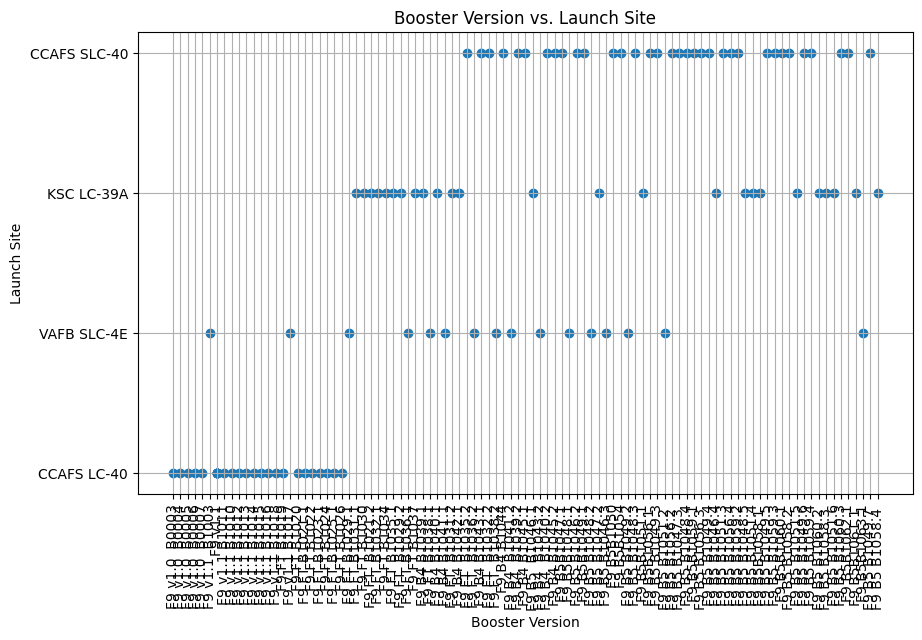

In [46]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Query to get the Booster Version and Launch Site
query = "SELECT Booster_Version, Launch_Site FROM SPACEXTABLE"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, con)

# Close the connection
con.close()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Booster_Version'], df['Launch_Site'])
plt.title('Booster Version vs. Launch Site')
plt.xlabel('Booster Version')
plt.ylabel('Launch Site')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### ppt :Show a scatter plot of Payload vs. Launch Site


In [48]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

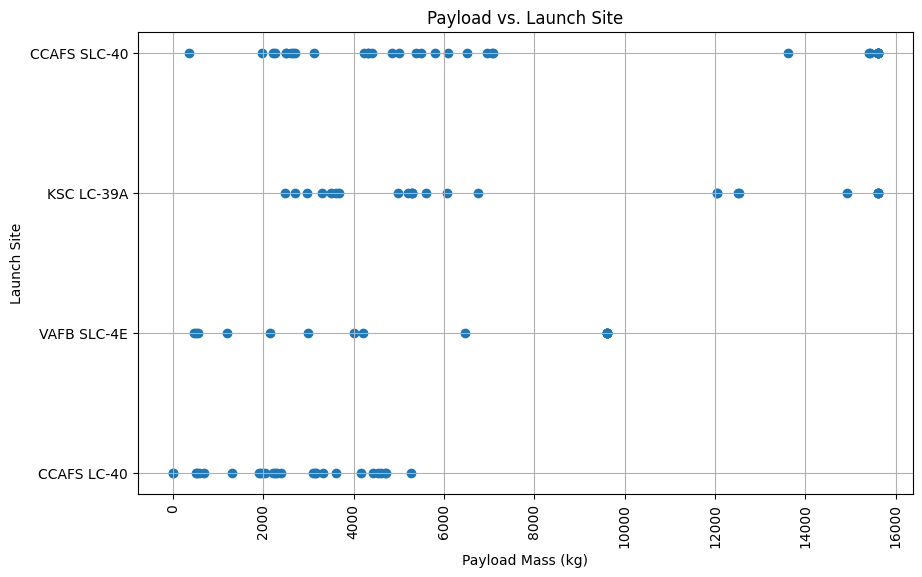

In [49]:
import matplotlib.pyplot as plt

# Query to get the Payload and Launch Site
query = "SELECT PAYLOAD_MASS__KG_, Launch_Site FROM SPACEXTABLE"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, con)

# Close the connection
con.close()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PAYLOAD_MASS__KG_'], df['Launch_Site'])
plt.title('Payload vs. Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### ppt : Show a bar chart for the success rate of each orbit type


In [50]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()

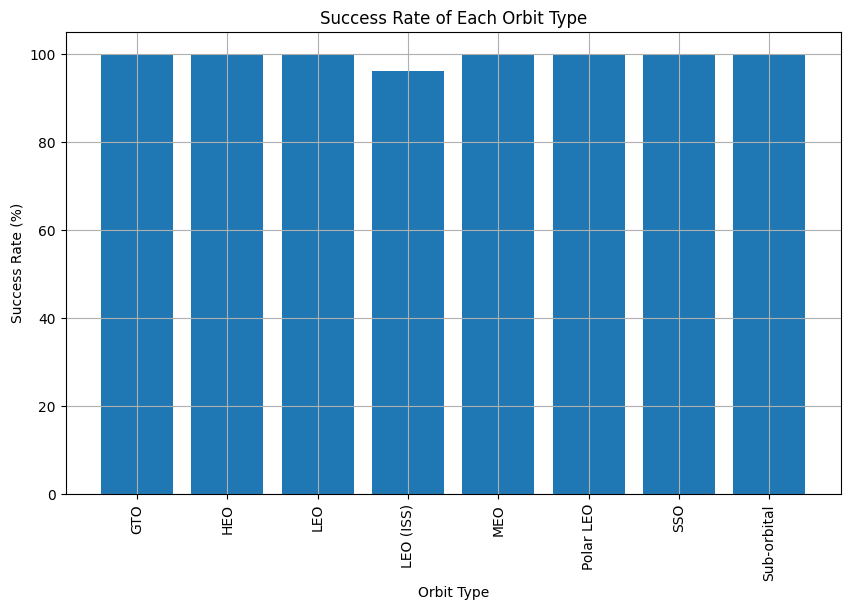

In [51]:
import matplotlib.pyplot as plt

# Query to get the orbit type and mission outcome
query = "SELECT Orbit, Mission_Outcome FROM SPACEXTABLE"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, con)

# Close the connection
con.close()

# Calculate the success rate for each orbit type
success_rate = df.groupby('Orbit')['Mission_Outcome'].apply(lambda x: (x.str.contains('Success').sum() / len(x)) * 100).reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(success_rate['Orbit'], success_rate['Mission_Outcome'])
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### ppt : Show a scatter point of Flight number vs. Orbit type


In [52]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()
con.close()

print("Table SPACEXTABLE created and data inserted successfully.")

Table SPACEXTABLE created and data inserted successfully.


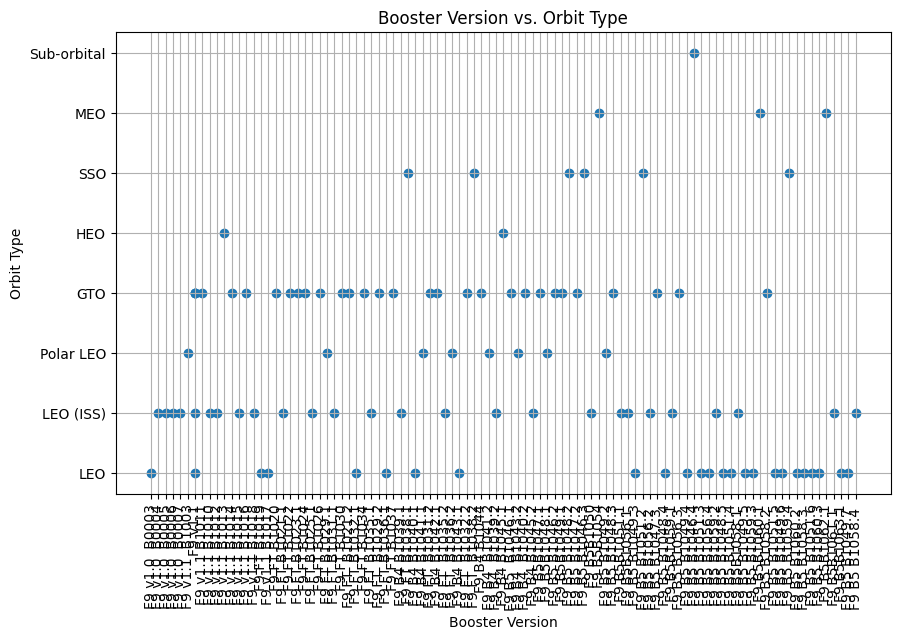

In [53]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Query to get the Booster Version and Orbit type
query = "SELECT Booster_Version, Orbit FROM SPACEXTABLE"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, con)

# Close the connection
con.close()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Booster_Version'], df['Orbit'])
plt.title('Booster Version vs. Orbit Type')
plt.xlabel('Booster Version')
plt.ylabel('Orbit Type')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### ppt : Show a scatter point of payload vs. orbit type


In [55]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()
con.close()

print("Table SPACEXTABLE created and data inserted successfully.")

Table SPACEXTABLE created and data inserted successfully.


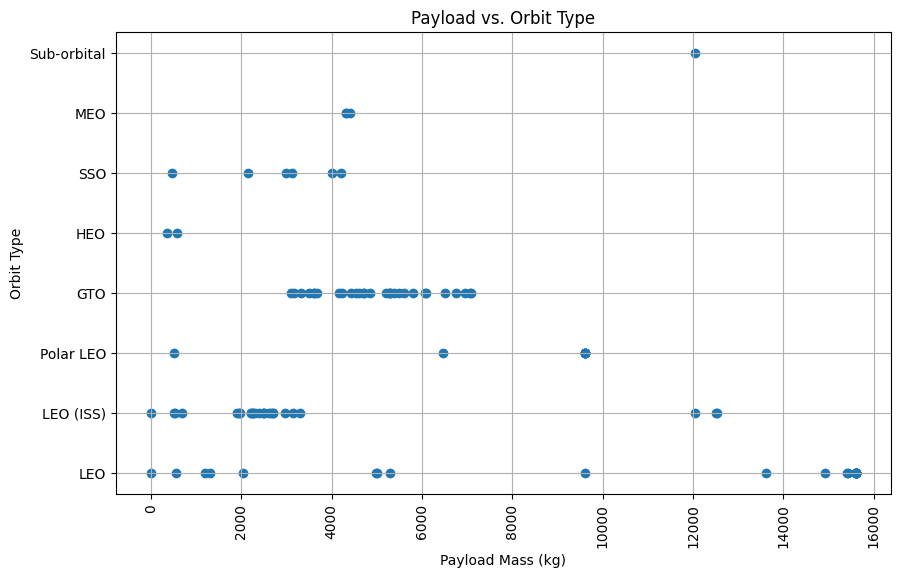

In [56]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Query to get the Payload and Orbit type
query = "SELECT PAYLOAD_MASS__KG_, Orbit FROM SPACEXTABLE"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, con)

# Close the connection
con.close()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PAYLOAD_MASS__KG_'], df['Orbit'])
plt.title('Payload vs. Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### ppt : Show a line chart of yearly average success rate


In [57]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()
con.close()

print("Table SPACEXTABLE created and data inserted successfully.")

Table SPACEXTABLE created and data inserted successfully.


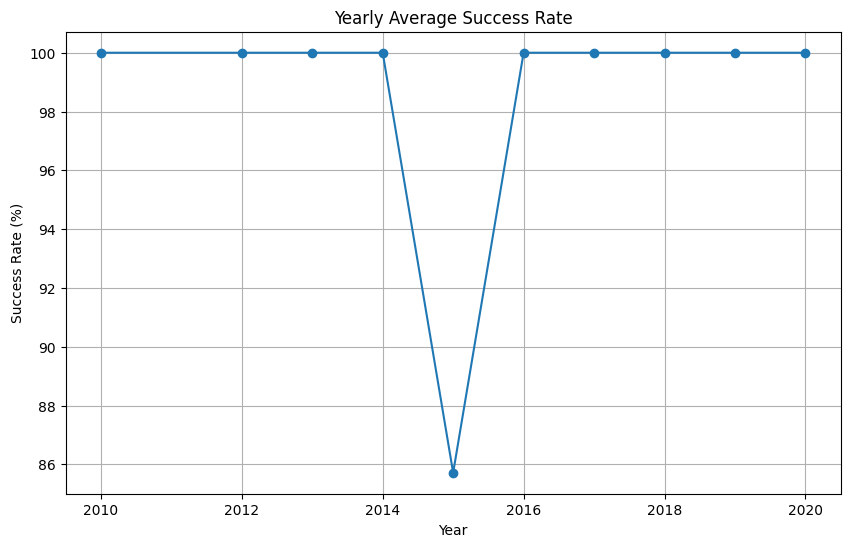

In [58]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Query to get the Date and Mission Outcome
query = "SELECT Date, Mission_Outcome FROM SPACEXTABLE"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, con)

# Close the connection
con.close()

# Extract year from Date and calculate yearly average success rate
df['Year'] = pd.to_datetime(df['Date']).dt.year
success_rate = df.groupby('Year')['Mission_Outcome'].apply(lambda x: (x.str.contains('Success').sum() / len(x)) * 100).reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(success_rate['Year'], success_rate['Mission_Outcome'], marker='o')
plt.title('Yearly Average Success Rate')
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')
plt.grid(True)
plt.show()

### ppt : Find the names of the unique launch sites


In [59]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()
con.close()

print("Table SPACEXTABLE created and data inserted successfully.")

Table SPACEXTABLE created and data inserted successfully.


In [60]:
import sqlite3

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Query to get unique launch sites
query = "SELECT DISTINCT Launch_Site FROM SPACEXTABLE"

# Execute the query
cur.execute(query)

# Fetch all results
launch_sites = cur.fetchall()

# Print the unique launch sites
print("Unique Launch Sites:")
for site in launch_sites:
    print(site[0])

# Close the connection
con.close()

Unique Launch Sites:
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


### ppt:Find 5 records where launch sites begin with `CCA`


In [61]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()
con.close()

print("Table SPACEXTABLE created and data inserted successfully.")

Table SPACEXTABLE created and data inserted successfully.


In [62]:
import sqlite3

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Query to get 5 records where launch sites begin with 'CCA'
query = "SELECT * FROM SPACEXTABLE WHERE Launch_Site LIKE 'CCA%' LIMIT 5"

# Execute the query
cur.execute(query)

# Fetch all results
records = cur.fetchall()

# Print the records
print("Records where launch sites begin with 'CCA':")
for record in records:
    print(record)

# Close the connection
con.close()

Records where launch sites begin with 'CCA':
('2010-06-04', '18:45:00', 'F9 v1.0  B0003', 'CCAFS LC-40', 'Dragon Spacecraft Qualification Unit', 0, 'LEO', 'SpaceX', 'Success', 'Failure (parachute)')
('2010-12-08', '15:43:00', 'F9 v1.0  B0004', 'CCAFS LC-40', 'Dragon demo flight C1, two CubeSats, barrel of Brouere cheese', 0, 'LEO (ISS)', 'NASA (COTS) NRO', 'Success', 'Failure (parachute)')
('2012-05-22', '7:44:00', 'F9 v1.0  B0005', 'CCAFS LC-40', 'Dragon demo flight C2', 525, 'LEO (ISS)', 'NASA (COTS)', 'Success', 'No attempt')
('2012-10-08', '0:35:00', 'F9 v1.0  B0006', 'CCAFS LC-40', 'SpaceX CRS-1', 500, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt')
('2013-03-01', '15:10:00', 'F9 v1.0  B0007', 'CCAFS LC-40', 'SpaceX CRS-2', 677, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt')


### ppt :Calculate the total payload carried by boosters from NASA


In [63]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()
con.close()

print("Table SPACEXTABLE created and data inserted successfully.")

Table SPACEXTABLE created and data inserted successfully.


In [64]:
import sqlite3

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Query to get the total payload mass carried by boosters from NASA
query = "SELECT SUM(PAYLOAD_MASS__KG_) FROM SPACEXTABLE WHERE Customer LIKE 'NASA%'"

# Execute the query
cur.execute(query)

# Fetch the result
total_payload_mass = cur.fetchone()[0]

# Print the total payload mass
print(f"Total payload mass carried by boosters from NASA: {total_payload_mass} kg")

# Close the connection
con.close()

Total payload mass carried by boosters from NASA: 99980 kg


### ppt: Calculate the average payload mass carried by booster version F9 v1.1


In [67]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()
con.close()

print("Table SPACEXTABLE created and data inserted successfully.")

Table SPACEXTABLE created and data inserted successfully.


In [68]:
import sqlite3

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Query to get the average payload mass carried by booster version F9 v1.1
query = "SELECT AVG(PAYLOAD_MASS__KG_) FROM SPACEXTABLE WHERE Booster_Version = 'F9 v1.1'"

# Execute the query
cur.execute(query)

# Fetch the result
avg_payload_mass = cur.fetchone()[0]

# Print the average payload mass
print(f"Average payload mass carried by booster version F9 v1.1: {avg_payload_mass} kg")

# Close the connection
con.close()

Average payload mass carried by booster version F9 v1.1: 2928.4 kg


### ppt : Find the dates of the first successful landing outcome on ground pad


In [69]:
import sqlite3
import pandas as pd

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Read CSV data into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")

# Drop the table if it exists and create a new table with non-null dates
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

con.commit()
con.close()

print("Table SPACEXTABLE created and data inserted successfully.")

Table SPACEXTABLE created and data inserted successfully.


In [70]:
import sqlite3

# Connect to SQLite database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Query to get the date of the first successful landing outcome on ground pad
query = """
SELECT MIN(Date) 
FROM SPACEXTABLE 
WHERE Landing_Outcome = 'Success (ground pad)'
"""

# Execute the query
cur.execute(query)

# Fetch the result
first_successful_landing_date = cur.fetchone()[0]

# Print the date of the first successful landing outcome on ground pad
print(f"Date of the first successful landing outcome on ground pad: {first_successful_landing_date}")

# Close the connection
con.close()

Date of the first successful landing outcome on ground pad: 2015-12-22
